In [2]:
 import numpy as np

# Datos proporcionados
productos = ["P1", "P2", "P3", "P4", "P5"]
ventas_promedio = [119, 140, 155, 158, 176]
volumenes_productos = [1, 0.8, 1.2, 1.5, 0.6]
numero_clientes = 10
productos_c_cliente = []

# Simulación de la venta de la empresa para un día
for cliente in range(numero_clientes):
    num_productos_comprados = np.random.randint(1, 4)  # Máximo 3 productos

    # Selección aleatoria de productos
    productos_comprados = np.random.choice(productos, size=num_productos_comprados, replace=False)
    productos_c_cliente.append(list(productos_comprados))

    # Cálculo del total de la compra para el cliente
    total_compra = sum([ventas_promedio[productos.index(producto)] for producto in productos_comprados])

    print(f"Cliente {cliente + 1}: Compró {num_productos_comprados} productos")
    print(f"Productos comprados: {productos_comprados}")
    #print(f"Total de la compra: {total_compra}\n")



Cliente 1: Compró 3 productos
Productos comprados: ['P5' 'P2' 'P4']
Cliente 2: Compró 1 productos
Productos comprados: ['P1']
Cliente 3: Compró 3 productos
Productos comprados: ['P1' 'P5' 'P4']
Cliente 4: Compró 1 productos
Productos comprados: ['P3']
Cliente 5: Compró 2 productos
Productos comprados: ['P1' 'P4']
Cliente 6: Compró 2 productos
Productos comprados: ['P1' 'P3']
Cliente 7: Compró 3 productos
Productos comprados: ['P2' 'P1' 'P3']
Cliente 8: Compró 3 productos
Productos comprados: ['P1' 'P3' 'P2']
Cliente 9: Compró 2 productos
Productos comprados: ['P3' 'P5']
Cliente 10: Compró 2 productos
Productos comprados: ['P5' 'P4']


In [3]:
productos_c_cliente

[['P5', 'P2', 'P4'],
 ['P1'],
 ['P1', 'P5', 'P4'],
 ['P3'],
 ['P1', 'P4'],
 ['P1', 'P3'],
 ['P2', 'P1', 'P3'],
 ['P1', 'P3', 'P2'],
 ['P3', 'P5'],
 ['P5', 'P4']]

In [4]:
# Normalizar las ventas promedio para obtener probabilidades relativas
probabilidades_relativas = np.array(ventas_promedio) / sum(ventas_promedio)
probabilidades_relativas = np.round(probabilidades_relativas, 4)
for i, producto in enumerate(productos):
    print(f"Producto {producto}: Probabilidad relativa = {probabilidades_relativas[i]:.4f}")

Producto P1: Probabilidad relativa = 0.1591
Producto P2: Probabilidad relativa = 0.1872
Producto P3: Probabilidad relativa = 0.2072
Producto P4: Probabilidad relativa = 0.2112
Producto P5: Probabilidad relativa = 0.2353


In [5]:
probabilidades_relativas

array([0.1591, 0.1872, 0.2072, 0.2112, 0.2353])

In [6]:
# Rangos de probabilidades
rangos_p = np.cumsum(probabilidades_relativas)
rangos_p

array([0.1591, 0.3463, 0.5535, 0.7647, 1.    ])

In [7]:
# Cálculo del volumen total de la compra para el cliente
product_volume_dict = dict(zip(productos, volumenes_productos))
print(product_volume_dict)


{'P1': 1, 'P2': 0.8, 'P3': 1.2, 'P4': 1.5, 'P5': 0.6}


In [8]:
# Cálculo del volumen total de la compra para el clientef
volumenes_clientes = []
for cliente in productos_c_cliente:
    vol_cliente = 0
    for producto in cliente:
        vol_cliente += product_volume_dict[producto]

    volumenes_clientes.append(round(vol_cliente, 1))


volumenes_clientes

[2.9, 1, 3.1, 1.2, 2.5, 2.2, 3.0, 3.0, 1.8, 2.1]

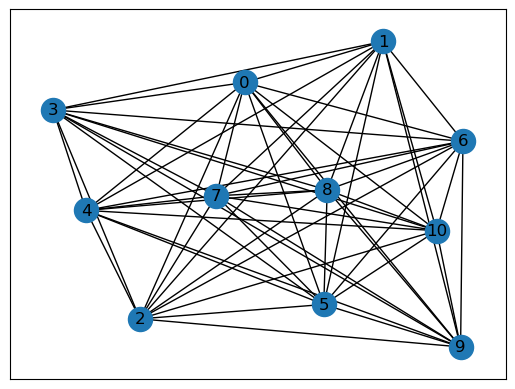

In [10]:
import numpy as np
import networkx as nx

labelDict = {'Warehouse': 0, 'Client 1': 1, 'Client 2': 2, 'Client 3': 3, 'Client 4': 4, 'Client 5': 5, 'Client 6': 6, 'Client 7': 7, 'Client 8': 8, 'Client 9': 9, 'Client 10': 19}

matrix = np.array([
    [0, 0.4, 1.5, 0.6, 0.1, 1.3, 1.1, 0.5, 1.3, 0.6, 0.5],
    [1.2, 0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.5, 0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [1.6, 0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [1.3, 0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.4, 1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.4, 1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [1.3, 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [1.5, 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.7, 0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.2, 1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])


G = nx.from_numpy_array(matrix)

nx.draw_networkx(G, with_labels=True)

In [11]:
import numpy as np

# Datos del problema
ganancias = volumenes_clientes
num_envios = len(ganancias)

# Nodo inicial
nodo_actual = np.random.randint(num_envios)
ruta = [nodo_actual]
visitados = set([nodo_actual])

# Nodo inicial
nodo_actual = np.random.randint(num_envios)
ruta = [nodo_actual]
visitados = set([nodo_actual])

# Construcción de la ruta
while len(ruta) < num_envios:
    max_aumento_ganancia = 0
    mejor_nodo = None

    for nodo in range(num_envios):
        if nodo not in visitados:
            aumento_ganancia = ganancias[nodo]
            if aumento_ganancia > max_aumento_ganancia:
                max_aumento_ganancia = aumento_ganancia
                mejor_nodo = nodo

    if mejor_nodo is not None:
        ruta.append(mejor_nodo)
        visitados.add(mejor_nodo)
    else:
        break

print("Ruta óptima:", ruta)

Ruta óptima: [1, 2, 6, 7, 0, 4, 5, 9, 8, 3]


In [12]:
len(ganancias)

10

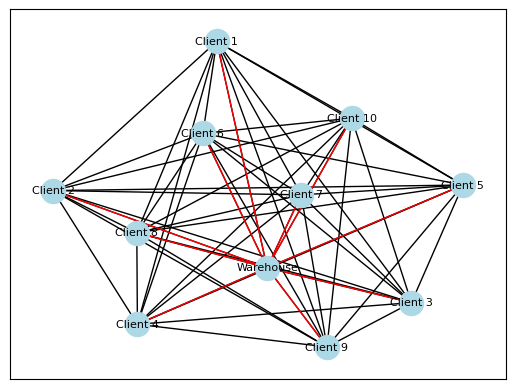

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

labelDict = {'Warehouse': 0, 'Client 1': 1, 'Client 2': 2, 'Client 3': 3, 'Client 4': 4, 'Client 5': 5, 'Client 6': 6, 'Client 7': 7, 'Client 8': 8, 'Client 9': 9, 'Client 10': 10}

matrix = np.array([
    [0, 0.4, 1.5, 0.6, 0.1, 1.3, 1.1, 0.5, 1.3, 0.6, 0.5],
    [1.2, 0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.5, 0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [1.6, 0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [1.3, 0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.4, 1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.4, 1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [1.3, 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [1.5, 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.7, 0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.2, 1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])

G = nx.from_numpy_array(matrix)

# Create a mapping for node labels using the dictionary
label_mapping = {v: k for k, v in labelDict.items()}

# Draw the graph with labels
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, labels=label_mapping, node_color='lightblue', font_size=8)

# Highlight lines coming from or to the Warehouse in red
edges = G.edges()
warehouse_edges = [(edge[0], edge[1]) for edge in edges if edge[0] == labelDict['Warehouse'] or edge[1] == labelDict['Warehouse']]
nx.draw_networkx_edges(G, pos, edgelist=warehouse_edges, edge_color='red')

plt.show()


In [ ]:
from ortools.constraint_solver import routing_enums_pb2, pywrapcp
import numpy as np


# Datos proporcionados
productos = ["P1", "P2", "P3", "P4", "P5"]
ventas_promedio = [119, 140, 155, 158, 176]
volumenes_productos = [1, 0.8, 1.2, 1.5, 0.6]
capacidad_unidad = 8
numero_clientes = 10

# Definir la matriz de tiempos
tiempos = [
    [0, 0.4, 1.5, 0.6, 0.1, 1.3, 1.1, 0.5, 1.3, 0.6, 0.5],
    [1.2, 0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.5, 0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [1.6, 0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [1.3, 0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.4, 1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.4, 1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [1.3, 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [1.5, 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.7, 0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.2, 1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
]

# Normalizar las ventas promedio para obtener probabilidades relativas
probabilidades_relativas = np.array(ventas_promedio) / sum(ventas_promedio)

# Crear el modelo del problema
manager = pywrapcp.RoutingIndexManager(numero_clientes + 1, 1, 0)
routing = pywrapcp.RoutingModel(manager)

# Crear el costo (en este caso, los tiempos entre clientes)
def tiempo_callback(from_index, to_index):
    return int(tiempos[from_index][to_index] * 60)  # Convertir a minutos (para simplificar)

transit_callback_index = routing.RegisterTransitCallback(tiempo_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Restricciones de capacidad de la unidad (similares al ejemplo anterior)
def demanda_callback(from_index):
    if from_index == 0:
        return 0  # Depósito
    return 1  # Cada cliente tiene una demanda de 1

demandas = [demanda_callback(i) for i in range(numero_clientes + 1)]

routing.AddDimensionWithVehicleCapacity(
    transit_callback_index,
    0,  # Slack
    [capacidad_unidad] * (numero_clientes + 1),  # Capacidad de la unidad para cada vehículo
    True,  # Incluir depósito
    "Capacidad")

# Búsqueda de solución con el algoritmo del vecino más cercano
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.SAVINGS)

solution = routing.SolveWithParameters(search_parameters)

# Imprimir las rutas, los volúmenes totales y los tiempos totales
for vehicle_id in range(numero_clientes):
    index = routing.Start(vehicle_id)
    plan_output = f"Ruta {vehicle_id + 1}: "
    volume = 0
    tiempo_total = 0
    while not routing.IsEnd(index):
        plan_output += f"{manager.IndexToNode(index)} "
        next_index = solution.Value(routing.NextVar(index))
        volume += volumenes_productos[next_index]
        tiempo_total += tiempos[index][next_index]
        index = next_index
    plan_output += f"Volumen total: {volume:.2f} m³"
    plan_output += f" - Tiempo total: {tiempo_total:.2f} horas"
    print(plan_output)


In [2]:
import numpy as np
from kmodes.kmodes import KModes
tiempos = np.array([
    [0, 0.4, 1.5, 0.6, 0.1, 1.3, 1.1, 0.5, 1.3, 0.6, 0.5],
    [1.2, 0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.5, 0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [1.6, 0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [1.3, 0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.4, 1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.4, 1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [1.3, 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [1.5, 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.7, 0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.2, 1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])


# random categorical data
data = tiempos

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 75.0
Run 2, iteration: 2/100, moves: 0, cost: 75.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 76.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 78.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 75.0
Best run was number 2
[[1.2 0.4 1.5 0.1 0.3 0.3 1.1 0.5 1.6 0.  1.7]
 [1.4 0.9 1.6 0.4 0.7 0.  0.  0.  0.4 0.6 1.9]
 [1.6 0.2 1.7 0.  0.5 0.7 1.6 1.8 1.2 1.  1.5]]


In [5]:
tiempos_no_warehouse = np.array([
    [0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [ 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [ 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])

tiempos = np.array([
    [0, 0.4, 1.5, 0.6, 0.1, 1.3, 1.1, 0.5, 1.3, 0.6, 0.5],
    [1.2, 0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.5, 0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [1.6, 0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [1.3, 0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.4, 1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.4, 1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [1.3, 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [1.5, 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.7, 0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.2, 1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])


In [6]:
import numpy as np
from scipy.spatial.distance import cdist

def k_medoids(X, k, max_iters=100):
    num_samples, num_features = X.shape
    medoids_indices = np.random.choice(num_samples, k, replace=False)
    medoids = X[medoids_indices]

    for _ in range(max_iters):
        distances = cdist(X, medoids, metric='euclidean')
        cluster_assignments = np.argmin(distances, axis=1)

        for i in range(k):
            cluster_points = X[cluster_assignments == i]
            cluster_distances = distances[cluster_assignments == i][:, i]
            new_medoid_index = np.argmin(cluster_distances)
            medoids[i] = cluster_points[new_medoid_index]

    return medoids, cluster_assignments

# Ejemplo de uso

X = tiempos_no_warehouse

k = 3
medoids, cluster_assignments = k_medoids(X, k)

print("Medoides finales:")
print(medoids)

clusters = {}
for i in range(k):
    cluster_points = np.where(cluster_assignments == i)[0]
    clusters[i] = cluster_points

print("Nodos en cada cluster:")
for cluster_id, node_indices in clusters.items():
    print(f"Cluster {cluster_id+1}: Nodos {node_indices+1}")


Medoides finales:
[[1.9 0.8 0.2 0.8 1.7 0.7 2.  1.6 1.7 0. ]
 [0.2 1.7 0.  0.5 0.7 1.6 1.8 1.2 1.  1.5]
 [1.1 0.1 0.5 0.8 0.  0.6 0.9 1.9 1.  1.9]]
Nodos en cada cluster:
Cluster 1: Nodos [ 6 10]
Cluster 2: Nodos [3 4 7 8 9]
Cluster 3: Nodos [1 2 5]


In [7]:
clusters

{0: array([5, 9], dtype=int64),
 1: array([2, 3, 6, 7, 8], dtype=int64),
 2: array([0, 1, 4], dtype=int64)}

In [8]:
mini_tcps = []
for i in clusters:
    i = list(clusters[i]) + [0]
    mini_tcps.append(tiempos[i,:][:,i])

In [8]:
for i in mini_tcps:
  print(i)

[[0.  0.1 0. ]
 [1.3 0.  1.3]
 [0.  0.1 0. ]]
[[0.  1.5 1.7 0.7 1.5 1.  1.2]
 [0.4 0.  0.1 1.5 1.4 0.7 0.5]
 [0.2 1.7 0.  0.7 1.2 1.  1.6]
 [1.1 0.1 0.5 0.  1.9 1.  1.4]
 [0.8 2.  0.8 0.3 0.  1.4 1.5]
 [0.1 0.6 0.3 2.  1.6 0.  0.7]
 [0.4 1.5 0.6 1.3 1.3 0.6 0. ]]
[[0.  0.6 1.4]
 [1.5 0.  1.3]
 [1.1 0.5 0. ]]


In [2]:
tiempos_no_warehouse = np.array([
    [0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [ 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [ 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])
tiempos_no_warehouse[[1,3],:][:,[0,3]]


array([[0.4, 1.1],
       [0.9, 0. ]])

In [9]:
import numpy as np
from scipy.spatial.distance import cdist

def k_medoids(X, k, max_iters=100):
    num_samples, num_features = X.shape
    medoids_indices = np.random.choice(num_samples, k, replace=False)
    medoids = X[medoids_indices]

    for _ in range(max_iters):
        distances = cdist(X, medoids, metric='euclidean')
        cluster_assignments = np.argmin(distances, axis=1)

        for i in range(k):
            cluster_points = X[cluster_assignments == i]
            cluster_distances = distances[cluster_assignments == i][:, i]
            new_medoid_index = np.argmin(cluster_distances)
            medoids[i] = cluster_points[new_medoid_index]

    return medoids, cluster_assignments

# Ejemplo de uso

# Aquí debes definir tu matriz X (tiempos_no_warehouse)
X = tiempos_no_warehouse

k = 3
medoids, cluster_assignments = k_medoids(X, k)

print("Medoides finales:")
print(medoids)

clusters = {}
cluster_distances_matrices = {}  # Aquí almacenaremos las matrices de distancias para cada cluster

for i in range(k):
    cluster_points = np.where(cluster_assignments == i)[0]
    clusters[i] = cluster_points
    cluster_matrix = X[cluster_points][:, cluster_points]
    cluster_distances_matrices[i] = cluster_matrix

print("Nodos en cada cluster:")
for cluster_id, node_indices in clusters.items():
    print(f"Cluster {cluster_id+1}: Nodos {node_indices+1}")
    print("Matriz de distancias:")
    print(cluster_distances_matrices[cluster_id])


Medoides finales:
[[1.1 0.1 0.5 0.8 0.  0.6 0.9 1.9 1.  1.9]
 [1.9 0.8 0.2 0.8 1.7 0.7 2.  1.6 1.7 0. ]
 [0.2 1.7 0.  0.5 0.7 1.6 1.8 1.2 1.  1.5]]
Nodos en cada cluster:
Cluster 1: Nodos [1 2 5]
Matriz de distancias:
[[0.  1.5 0.7]
 [0.4 0.  1.5]
 [1.1 0.1 0. ]]
Cluster 2: Nodos [ 6 10]
Matriz de distancias:
[[0.  0.3]
 [0.7 0. ]]
Cluster 3: Nodos [3 4 7 8 9]
Matriz de distancias:
[[0.  0.5 1.8 1.2 1. ]
 [1.1 0.  1.3 1.7 0.3]
 [1.8 1.4 0.  0.4 0.6]
 [0.8 0.3 1.6 0.  1.4]
 [0.3 0.3 0.5 1.6 0. ]]


In [10]:
clusters

{0: array([0, 1, 4], dtype=int64),
 1: array([5, 9], dtype=int64),
 2: array([2, 3, 6, 7, 8], dtype=int64)}